## Feature Selection Results ##

*** Description of Notebook: ***

In this notebook, I conduct several methods of feature selection. These methods include both supervised and unsupervised approaches. I've coded and commented out parts of this notebook that would allow for different subsets of the UCI data to be used to run through feature selection (this notebook) and modeling (next notebook).

Contents:
1. Data Import
2. Unsupervised Approach
    - Looked at correlation (.corr()) between features and returned those features that are highly correlated ( > 0.5) with at least one other feature.
    - The result was 20 features: 
        - 28, 48, 64, 105, 128, 153, 241, 281, 318, 336, 338, 378, 433, 442, 451, 453, 455, 472, 475, 493
    - Visualizations of those 20 features
3. Supervised Approaches
    - Select from Model w/ Logistic Regression (L2 penalty)
    - Select from Model w/ Logistic Regression (L1 penalty)
    - SelectKBest w/ k = 20
    - RFE w/ RandomForestClassifier as estimator

These approaches all gave me various feature importances and coefficients with little consistency across them.
    
**Results:** I decided to use the 20 features gained from the correlation approach. Given that I know the madelon data has 20 important (or redundant) features and 480 noise, I felt comfortable with the approach that produced exactly 20 features.

## Feature Selection Code ##

In [1]:
% run __init__.py

** Data Import**

In [2]:
train_data = pd.read_csv('./data/madelon_train.data', 
                         sep = ' ', header = None).drop(500, axis = 1)
train_labels = pd.read_csv('./data/madelon_train.labels', sep = ' ', header = None)

In [3]:
val_data = pd.read_csv('./data/madelon_valid.data', 
                         sep = ' ', header = None).drop(500, axis = 1)
val_labels = pd.read_csv('./data/madelon_valid.labels', sep = ' ', header = None)

In [4]:
test_data = pd.read_csv('./data/madelon_test.data', 
                         sep = ' ', header = None).drop(500, axis = 1)

In [5]:
train_data['target'] = train_labels
val_data['target'] = val_labels

In [6]:
df = train_data.append(val_data)

** Subsetting and Subset Analysis **

In [7]:
sub1 = df.sample((int(.1*(len(df)))), random_state = 22)
sub1.shape

(260, 501)

In [8]:
# sub2 = df.sample((int(.1*(len(df)))), random_state = 8)
# sub2.shape

In [9]:
# sub3 = df.sample((int(.1*(len(df)))), random_state = 10)
# sub3.shape

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc78af4deb8>]], dtype=object)

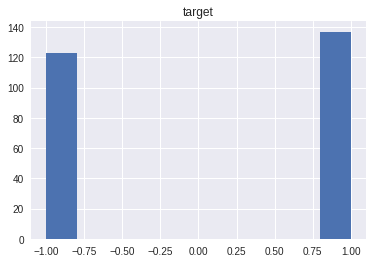

In [10]:
sub1.hist(column = 'target')
# sub2.hist(column = 'target')
# sub3.hist(column = 'target')

In [11]:
sub1['target'].value_counts()

 1    137
-1    123
Name: target, dtype: int64

In [12]:
# base_neg1 = 123/260
# print(base_neg1)

0.47307692307692306


In [13]:
# base_pos1 = 1-base_neg1
# print(base_pos1)

0.5269230769230769


In [14]:
predictors = sub1[sub1.columns[0:500]]
target = sub1[sub1.columns[500]]

# predictors = sub2[sub2.columns[0:500]]
# target = sub2[sub2.columns[500]]

# predictors = sub3[sub3.columns[0:500]]
# target = sub3[sub3.columns[500]]

In [15]:
predictors.shape

(260, 500)

In [16]:
target.shape

(260,)

## Feature Selection - Unsupervised Method ##

Let's do some unsupervised EDA on the features first

In [17]:
predictors_corr = predictors.corr()
predictors_corr.shape

(500, 500)

In [18]:
predictors_corr.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,-0.037105,-0.016606,0.004372,-0.012952,0.003256,0.053045,0.026269,-0.110127,-0.021511,...,-0.040742,-0.092388,-0.076738,0.027749,0.058485,-0.016551,0.031464,-0.018250,-0.010998,-0.016663
1,-0.037105,1.000000,0.040409,0.037227,0.040151,0.102386,-0.040409,0.031937,-0.037238,-0.019464,...,0.073771,-0.064704,0.110475,0.025270,-0.024876,-0.005204,-0.130606,0.026605,-0.028510,0.104295
2,-0.016606,0.040409,1.000000,0.085898,0.040409,-0.059936,-0.009983,-0.020935,0.061579,0.089688,...,0.047518,-0.043479,0.034538,0.044605,-0.030181,-0.026363,-0.040739,0.073863,0.121851,0.014309
3,0.004372,0.037227,0.085898,1.000000,-0.002353,-0.001176,-0.033216,0.101130,0.026898,0.023505,...,0.085727,-0.064618,-0.088208,0.028380,-0.005643,0.048484,-0.097915,0.045553,-0.107569,0.015473
4,-0.012952,0.040151,0.040409,-0.002353,1.000000,0.055002,-0.008981,0.046222,-0.112019,-0.003975,...,0.004915,-0.071764,-0.041055,-0.038614,0.068460,-0.017085,0.059074,0.049160,0.043797,0.074471


** Feature Correlation: **
Selecting features that are highly correlated with other features and storing the indexes. 
1. First line sets the threshold for 'highly correlated'. 
2. Second line makes sure it's identifying those features that are highly correlated to at least 2 features (itself and 1 other). 
3. Third line stores those indexes to a list.

In [19]:
hi_corrs = predictors_corr.abs() > .5
hi_count = predictors_corr[hi_corrs].count() > 1
top_corrs = list(predictors_corr[hi_count].index)

In [20]:
len(top_corrs)

20

In [21]:
print(top_corrs)

[28, 48, 64, 105, 128, 153, 241, 281, 318, 336, 338, 378, 433, 442, 451, 453, 455, 472, 475, 493]


In [22]:
predictors_trim = predictors[top_corrs]
predictors_trim.shape

(260, 20)

Now that we have our 20 features, I've provided some visualizations

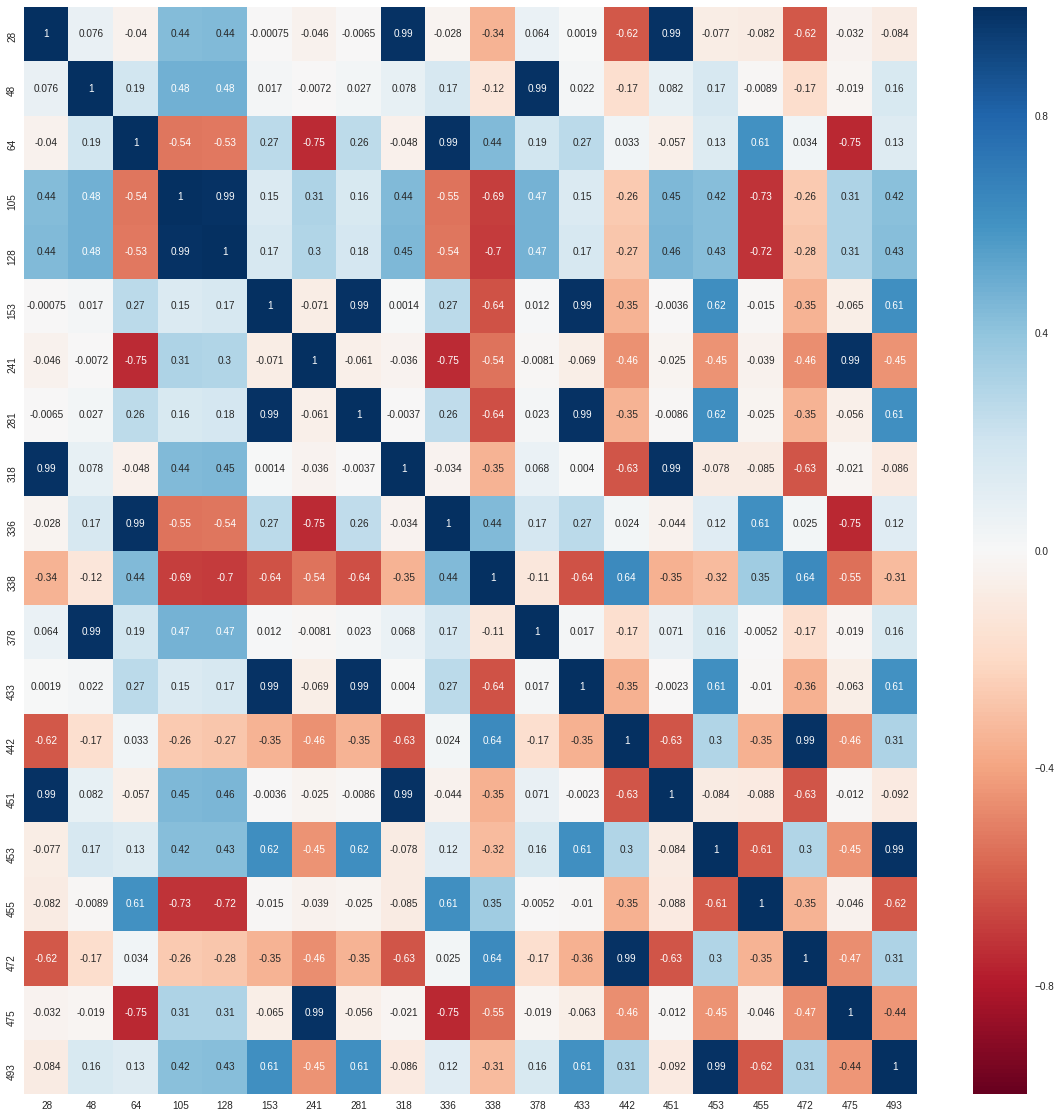

In [23]:
predictors_trim_corr = predictors_trim.corr()
plt.figure(figsize = (20,20))
sns.heatmap(predictors_trim_corr, cmap = 'RdBu', annot = True)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


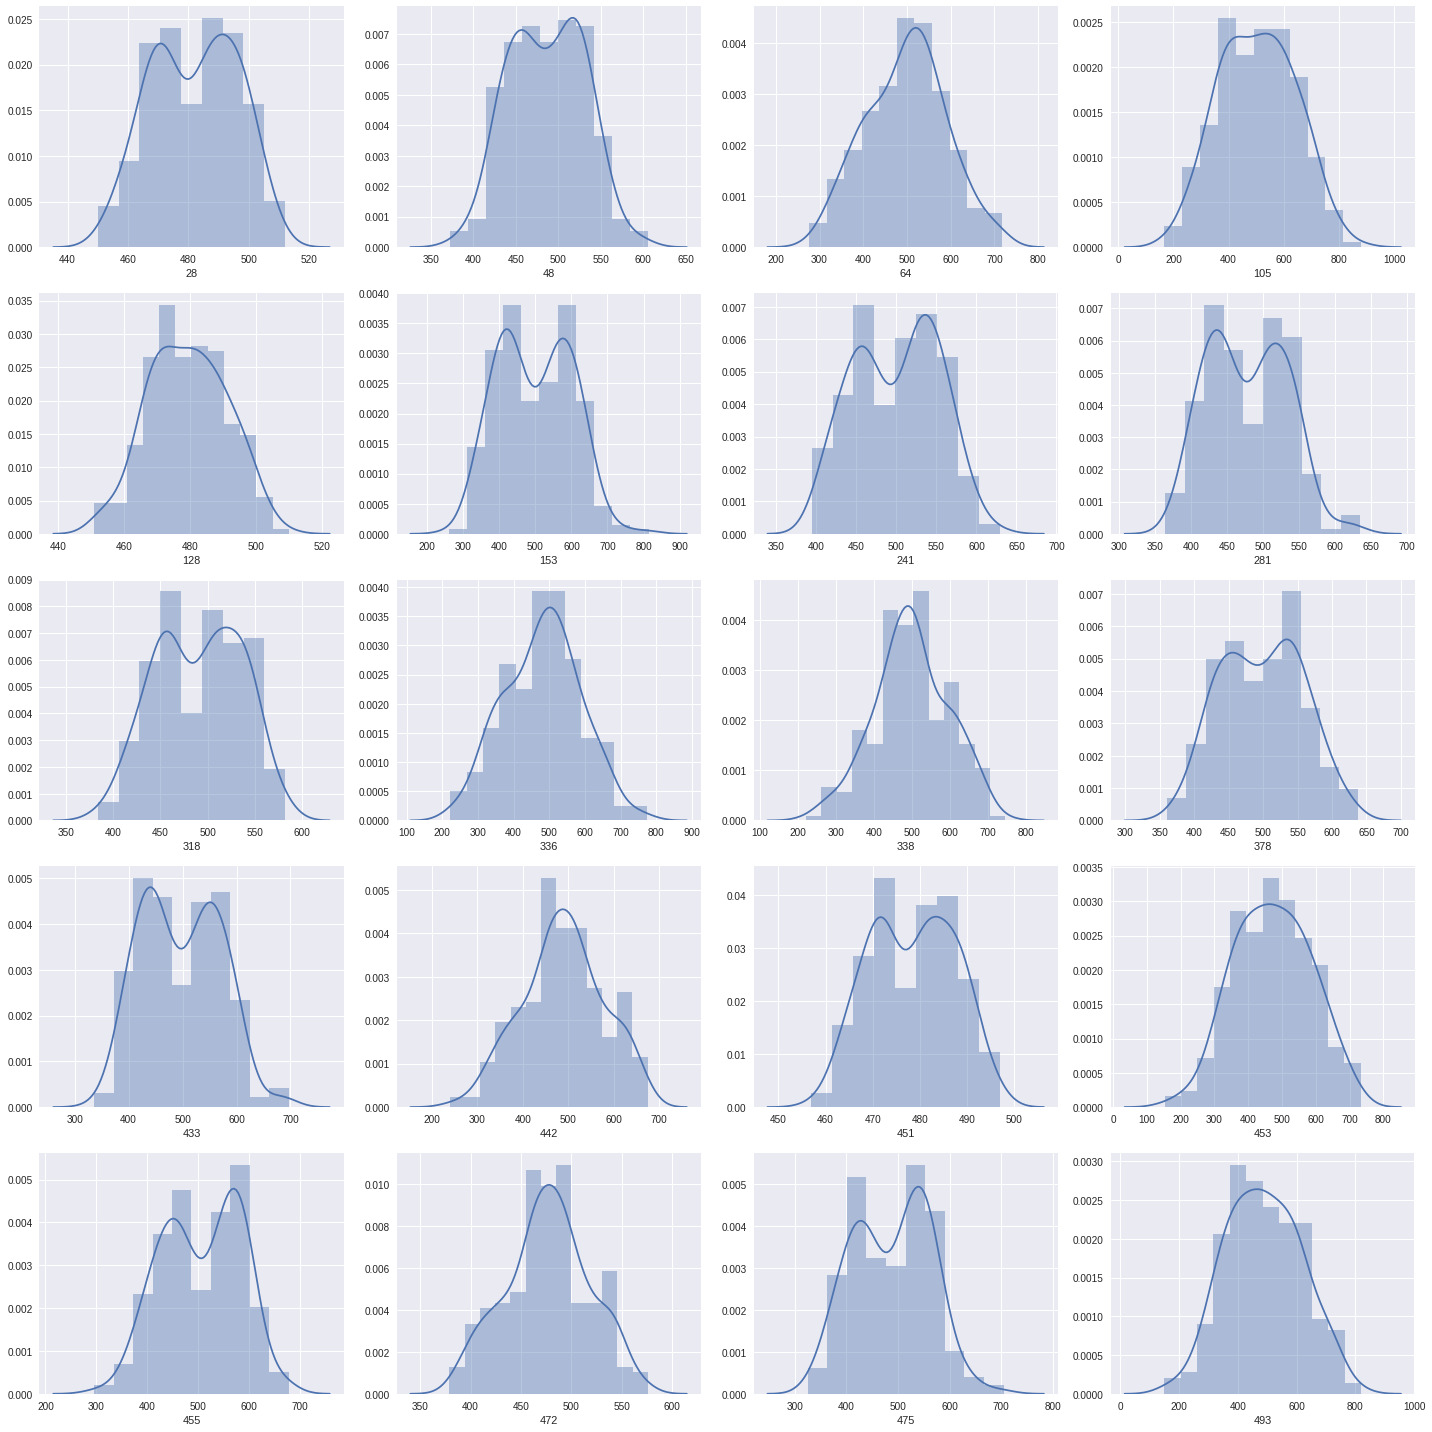

In [24]:
fig = plt.figure(figsize = (20,20))

for i, col in enumerate(predictors_trim.columns):
    fig.add_subplot(5,4,1+i)
    sns.distplot(predictors_trim[col])
    
    
fig.tight_layout()
fig.show()

In [25]:
predictors_trim['target'] = target

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
elite_df = predictors_trim.copy()

In [27]:
elite_df.to_pickle('data/elite_df_1.p')
# elite_df.to_pickle('data/elite_df_2.p')
# elite_df.to_pickle('data/elite_df_3.p')

## Feature Selection - Supervised Methods ##

** Splitting and Deskewing **

In [40]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = .2, random_state = 42)

In [41]:
X_train_bc = pd.DataFrame()
X_test_bc = pd.DataFrame()
for col in X_train.columns:
    box_cox_trans_train, lmbda = boxcox(X_train[col])
    box_cox_trans_test = boxcox(X_test[col], lmbda)
    X_train_bc[col] = pd.Series(box_cox_trans_train)
    X_test_bc[col] = pd.Series(box_cox_trans_test)

/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: invalid value encountered in subtract
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: overflow encountered in square
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1855: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)


**Select From Model** - Logistic Regression as estimator with L2 penalty

In [42]:
scaler = StandardScaler()
lr_l2 = LogisticRegression(C = .0001)
sfm1 = SelectFromModel(lr_l2, threshold = 'mean')
pipe_sfm_lr = Pipeline([
    ('scaler', scaler),  
    ('sfm', sfm1) 
])

In [43]:
pipe_sfm_lr.fit(X_train_bc, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sfm', SelectFromModel(estimator=LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
        prefit=False, threshold='mean'))])

In [44]:
sfm1_feats = np.where(sfm1.get_support())[0]
sfm1_feats

array([  0,   3,   4,   5,   9,  11,  14,  16,  19,  21,  22,  28,  29,
        30,  31,  32,  33,  37,  39,  43,  46,  48,  49,  51,  52,  53,
        55,  57,  60,  62,  64,  67,  74,  77,  78,  81,  85,  86,  89,
        98,  99, 100, 105, 108, 113, 120, 121, 127, 128, 129, 133, 134,
       135, 138, 141, 143, 148, 149, 152, 156, 157, 158, 162, 164, 165,
       166, 167, 169, 174, 175, 176, 177, 181, 189, 190, 191, 196, 197,
       199, 202, 203, 204, 206, 207, 208, 212, 215, 218, 220, 221, 222,
       224, 225, 227, 228, 233, 237, 238, 241, 243, 246, 248, 253, 258,
       260, 263, 265, 267, 268, 271, 272, 273, 276, 278, 283, 284, 285,
       286, 289, 293, 294, 295, 296, 297, 301, 304, 305, 307, 310, 313,
       316, 318, 319, 321, 322, 324, 326, 328, 329, 330, 331, 336, 337,
       338, 339, 341, 345, 352, 354, 365, 368, 369, 374, 375, 378, 380,
       382, 383, 386, 388, 399, 400, 401, 406, 409, 412, 413, 414, 415,
       416, 417, 420, 421, 425, 426, 428, 429, 431, 432, 434, 43

In [45]:
len(sfm1_feats)

208

In [46]:
sfm1_feat_coef_ind = np.argsort(np.abs(sfm1.estimator_.coef_))[0][::-1]

In [47]:
sfm1_feat_coef_val = np.sort(np.abs(sfm1.estimator_.coef_))[0][::-1]
sfm1_feat_coef_val

array([  4.20818235e-03,   4.17028567e-03,   3.42803678e-03,
         3.40956947e-03,   2.21754458e-03,   2.14666481e-03,
         2.09637130e-03,   2.03920931e-03,   2.00227480e-03,
         1.98684275e-03,   1.95823074e-03,   1.92521143e-03,
         1.77081015e-03,   1.73789920e-03,   1.70397409e-03,
         1.70307732e-03,   1.65881048e-03,   1.60145497e-03,
         1.58566737e-03,   1.57189441e-03,   1.56927532e-03,
         1.55660464e-03,   1.54021947e-03,   1.53249673e-03,
         1.49511604e-03,   1.48814272e-03,   1.47292466e-03,
         1.47025713e-03,   1.46551087e-03,   1.46048105e-03,
         1.43259336e-03,   1.42299100e-03,   1.37196907e-03,
         1.35265517e-03,   1.34587169e-03,   1.33871502e-03,
         1.32763485e-03,   1.32615046e-03,   1.32253132e-03,
         1.31600257e-03,   1.30437311e-03,   1.30117368e-03,
         1.29895395e-03,   1.28849935e-03,   1.28830475e-03,
         1.28598064e-03,   1.28455445e-03,   1.27388346e-03,
         1.25773559e-03,

Reduced the space and size, but doesn't say anything about the top 20 features specifically. Still left with **208 features**.

**Select From Model ** - Logistic Regression as estimator with L1 penalty

In [48]:
scaler = StandardScaler()
lr_l1 = LogisticRegression(penalty='l1', C = .1)
sfm2 = SelectFromModel(lr_l1)
pipe_sfm_lr_l1 = Pipeline([
    ('scaler', scaler),  
    ('sfm', sfm2) 
])

In [49]:
pipe_sfm_lr_l1.fit(X_train_bc, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sfm', SelectFromModel(estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        prefit=False, threshold=None))])

In [50]:
sfm2_feats = np.where(sfm2.get_support())[0]
sfm2_feats

array([  3,   5,   9,  11,  33, 105, 121, 129, 165, 191, 212, 224, 237,
       241, 260, 268, 278, 283, 285, 289, 307, 319, 331, 354, 369, 378,
       388, 399, 421, 428, 431, 446, 485, 491, 495])

In [51]:
len(sfm2_feats)

35

In [52]:
sfm2_feat_coef_val = np.sort(np.abs(sfm2.estimator_.coef_))[0][::-1]
sfm2_feat_coef_val[sfm2_feat_coef_val > 0]

array([ 0.65417255,  0.18530125,  0.18190451,  0.17750144,  0.14748042,
        0.14520476,  0.14178127,  0.13162779,  0.11720612,  0.08683573,
        0.06797768,  0.06792143,  0.05848594,  0.05824223,  0.05781012,
        0.051367  ,  0.05002792,  0.04738189,  0.04079706,  0.04026494,
        0.03958589,  0.03814561,  0.03611413,  0.03305983,  0.03053221,
        0.0291367 ,  0.02706013,  0.0264596 ,  0.02466595,  0.02417555,
        0.02331616,  0.02041437,  0.01007256,  0.0052572 ,  0.00489161])

In [53]:
sfm2_feat_coef_ind = np.argsort(np.abs(sfm2.estimator_.coef_))[0][::-1]
sfm2_feat_coef_ind[sfm2_feat_coef_val > 0]

array([241, 121, 369, 331,   3,  11, 399,  33, 307, 129, 260, 428, 105,
       388, 285, 278, 319, 354, 191, 421, 283,   5, 268,   9, 224, 165,
       491, 237, 485, 378, 289, 212, 446, 495, 431])

L1 penalty 0's out some features, giving only **35 'important features'**.

** SelectKBest **

In [54]:
scaler = StandardScaler()
skb = SelectKBest(f_classif, k = 20)
pipe_fs_skb = Pipeline([
    ('scaler', scaler),  
    ('skb', skb) 
])

In [55]:
pipe_fs_skb.fit(X_train_bc, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('skb', SelectKBest(k=20, score_func=<function f_classif at 0x7f61a4ebc158>))])

In [56]:
skb_pvals = skb.pvalues_

In [57]:
skb.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,

In [58]:
skb_feats = np.where(skb.get_support())[0]
skb_feats

array([  3,  33,  64, 105, 121, 128, 165, 191, 212, 224, 241, 285, 307,
       331, 336, 338, 369, 399, 421, 475])

We get **20 features** by nature of k=20 in the SelectKBest. Do we know that these are the important features?

** RFE **

Recursive Feature Elimination with a Random Forest estimator.

In [59]:
scaler = StandardScaler()
rfe = RFECV(estimator = RandomForestClassifier(), step = 1, cv = 5, scoring = 'accuracy')
pipe_rfe = Pipeline([
    ('scaler', scaler),  
    ('rfe', rfe) 
])

In [60]:
pipe_rfe.fit(X_train_bc, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfe', RFECV(cv=5,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_sa...one,
            verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0))])

In [61]:
X_train_bc.shape

(208, 500)

In [62]:
rfe.n_features_

8

In [63]:
rfe.support_.sum()

8

In [64]:
len(rfe.estimator_.feature_importances_)

8

In [65]:
rfe_feat_coef_val = np.sort(rfe.estimator_.feature_importances_)[::-1]
rfe_feat_coef_val[rfe_feat_coef_val > 0]

array([ 0.24344181,  0.14763297,  0.12977722,  0.12472813,  0.09478226,
        0.0934832 ,  0.08829971,  0.07785471])

In [ ]:
rfe_feat_coef_ind = np.argsort(rfe.estimator_.feature_importances_)[::-1]
rfe_feat_coef_ind[rfe_feat_coef_val > 0]

In [ ]:
len(rfe_feat_coef_ind[rfe_feat_coef_val > 0])

We get **32 important features** from this feature selection model.